# SIG720 - Machine Learning
## Task P2 (Pass Task 2)

Submitted by - <i>Surya Pradeep Kumar Varma</i><br>
Deakin ID - <b>223020011</b><br>
Target Grade - P (Pass Task)<br>
Email Address - suryapradeepv@gmail.com

# Index

[1. Linear Regression on Housing Dataset](#1.-Linear-Regression-on-Housing-Dataset)<br>
[2. PCA on Housing Dataset](#2.-PCA-on-housing-dataset)<br>
[3. PCA, Logistic Regression on Iris Dataset](#3.-PCA,-Logistic-Regression-on-Iris-Dataset)<br>
[4. L1 / L2 Regularization with LR model](#4.-L1-/-L2-Regularizaion-with-LR-model)<br>
[5. PCA on digits Dataset](#5.-PCA-on-digits-Dataset)<br>
[6. SVM Classification with digits Dataset](#6.-SVM-Classification-with-digits-Dataset)<br>
[7. tSNE with Diabetes Dataset](#7.-tSNE-with-Diabetes-Dataset)<br>
[8. SVM Regression with diabetes dataset](#8.-SVM-Regression-with-diabetes-dataset)<br>
[9. Hyper-parameter findings](#9.-Hyper-parameter-findings)<br>

[References](#References)

In [1]:
# Import essential libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings


from pprint import pprint
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

seed = 7
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Linear Regression on Housing Dataset

### 1.1. Load the Data

#### Data Description: 

```
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s
```

In [2]:
# import csv
df1 = pd.read_csv("./housing.csv")
df1.head(7)

CRIM    ZN   INDUS   CHAS    NOX     RM   AGE     DIS   RAD   TAX  \
0  0.00632  18.0    2.31      0  0.538  6.575  65.2  4.0900     1   296   
1  0.02731   0.0    7.07      0  0.469  6.421  78.9  4.9671     2   242   
2  0.02729   0.0    7.07      0  0.469  7.185  61.1  4.9671     2   242   
3  0.03237   0.0    2.18      0  0.458  6.998  45.8  6.0622     3   222   
4  0.06905   0.0    2.18      0  0.458  7.147  54.2  6.0622     3   222   
5  0.02985   0.0    2.18      0  0.458  6.430  58.7  6.0622     3   222   
6  0.08829  12.5    7.87      0  0.524  6.012  66.6  5.5605     5   311   

    PTRATIO       B   LSTAT   MEDV  
0      15.3  396.90    4.98   24.0  
1      17.8  396.90    9.14   21.6  
2      17.8  392.83    4.03   34.7  
3      18.7  394.63    2.94   33.4  
4      18.7  396.90    5.33   36.2  
5      18.7  394.12    5.21   28.7  
6      15.2  395.60   12.43   22.9

In [3]:
df1.shape

(506, 14)

In [4]:
df1.info()  # no missing values, all columns are floating points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0    CRIM     506 non-null    float64
 1    ZN       506 non-null    float64
 2    INDUS    506 non-null    float64
 3    CHAS     506 non-null    int64  
 4    NOX      506 non-null    float64
 5    RM       506 non-null    float64
 6    AGE      506 non-null    float64
 7    DIS      506 non-null    float64
 8    RAD      506 non-null    int64  
 9    TAX      506 non-null    int64  
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
 13   MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# column names have an empty space as prefix for each column

df1.columns

Index([' CRIM', ' ZN', ' INDUS', ' CHAS', ' NOX', ' RM', ' AGE', ' DIS',
       ' RAD', ' TAX', ' PTRATIO', ' B', ' LSTAT', ' MEDV'],
      dtype='object')

In [6]:
# get rename dict for each col by stripping whitespace

rename_dict = {col: col.strip() for col in list(df1.columns)}
print(rename_dict)

{' CRIM': 'CRIM', ' ZN': 'ZN', ' INDUS': 'INDUS', ' CHAS': 'CHAS', ' NOX': 'NOX', ' RM': 'RM', ' AGE': 'AGE', ' DIS': 'DIS', ' RAD': 'RAD', ' TAX': 'TAX', ' PTRATIO': 'PTRATIO', ' B': 'B', ' LSTAT': 'LSTAT', ' MEDV': 'MEDV'}


In [7]:
# rename all cols

df1.rename(columns=rename_dict, inplace=True)
df1.head(3)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7

### 1.2. EDA

In [8]:
df1.describe()  # basic descr. stats

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

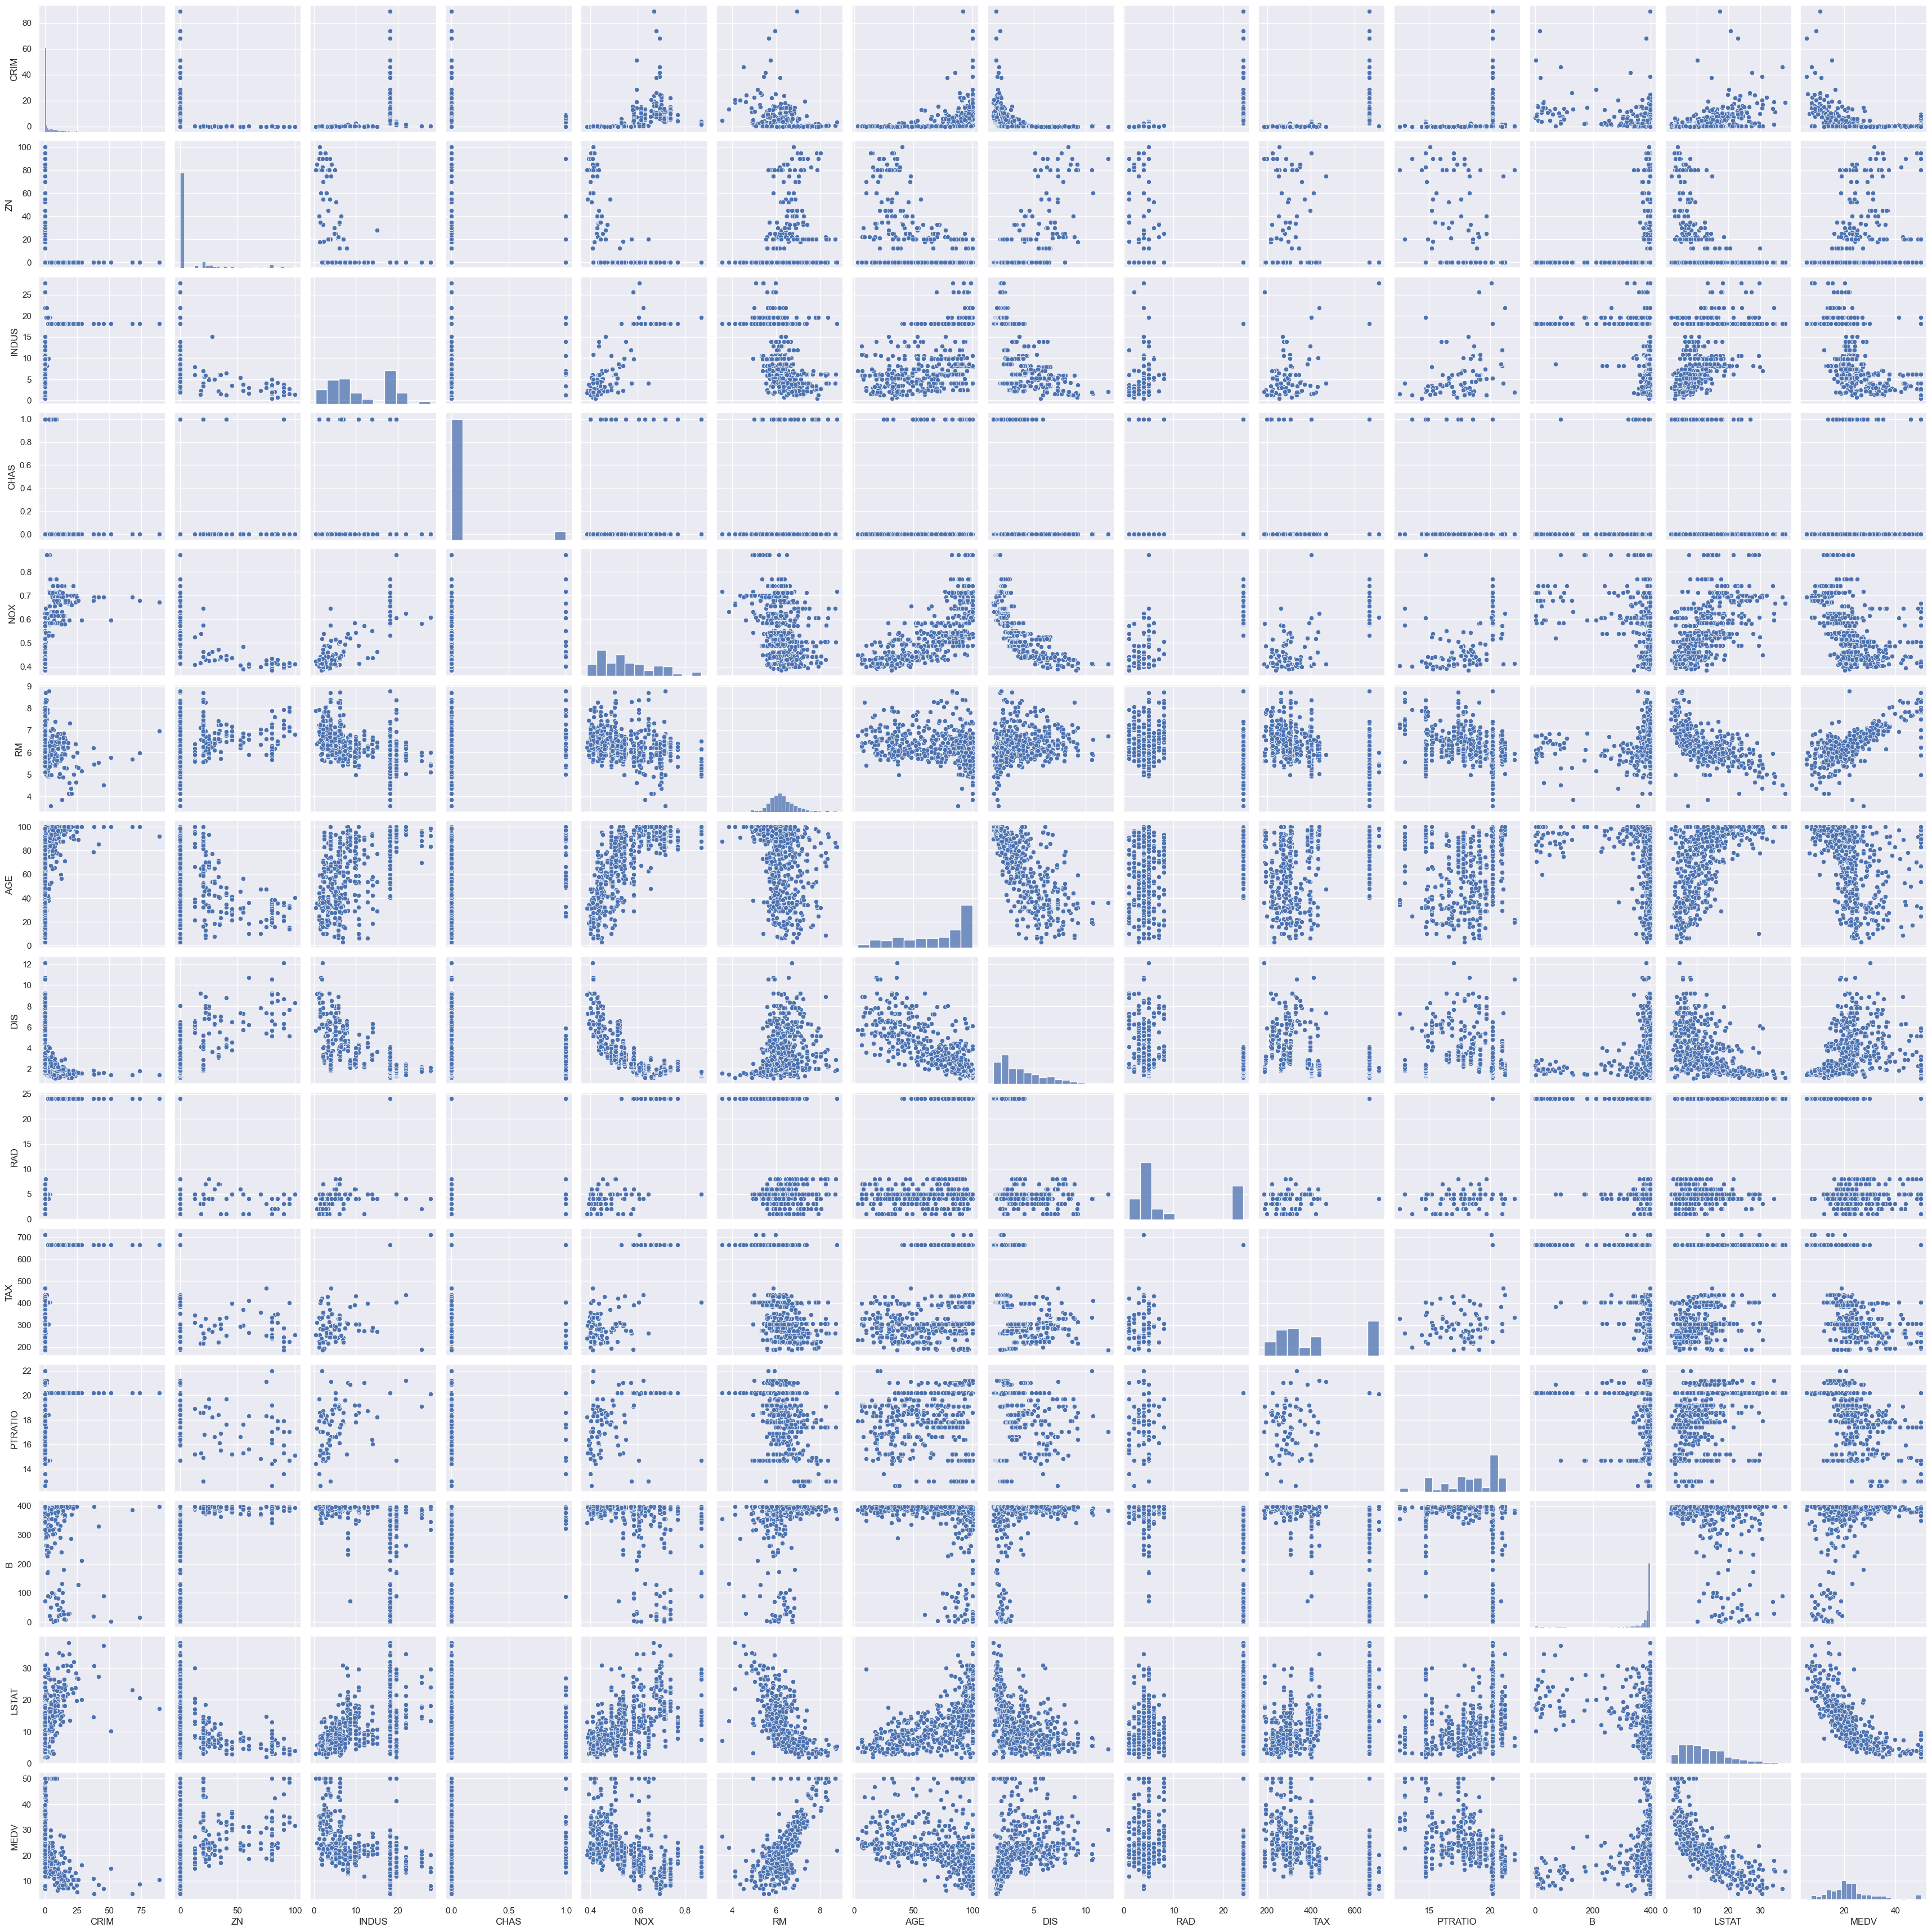

In [9]:
# pairplot
sns.set()
sns.pairplot(df1)
plt.show()

> we can see a few predictors which seem to be correlated with each other

In [10]:
import plotly.figure_factory as ff

def get_correlation_heatmap(df) -> None:
    """
    utility function to check correlations heatmap of
    numerical variables in a dataframe through plotly
    """
    corr = df.corr().round(2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    df_mask = corr.mask(mask)

    fig = ff.create_annotated_heatmap(z=df_mask.to_numpy(), 
                                      x=df_mask.columns.tolist(),
                                      y=df_mask.columns.tolist(),
                                      colorscale=px.colors.diverging.RdBu,
                                      hoverinfo="none", #Shows hoverinfo for null values
                                      showscale=True, ygap=1, xgap=1
                                     )

    fig.update_xaxes(side="bottom")

    fig.update_layout(
        title_text='Correation Heatmap', 
        title_x=0.5, 
        height=700,
        autosize=False,
        xaxis_showgrid=False,
        yaxis_showgrid=False,
        xaxis_zeroline=False,
        yaxis_zeroline=False,
        yaxis_autorange='reversed',
        template='plotly_white'
    )

    # NaN values are not handled automatically and are displayed in the figure
    # So we need to get rid of the text manually
    for i in range(len(fig.layout.annotations)):
        if fig.layout.annotations[i].text == 'nan':
            fig.layout.annotations[i].text = ""

    fig.show()

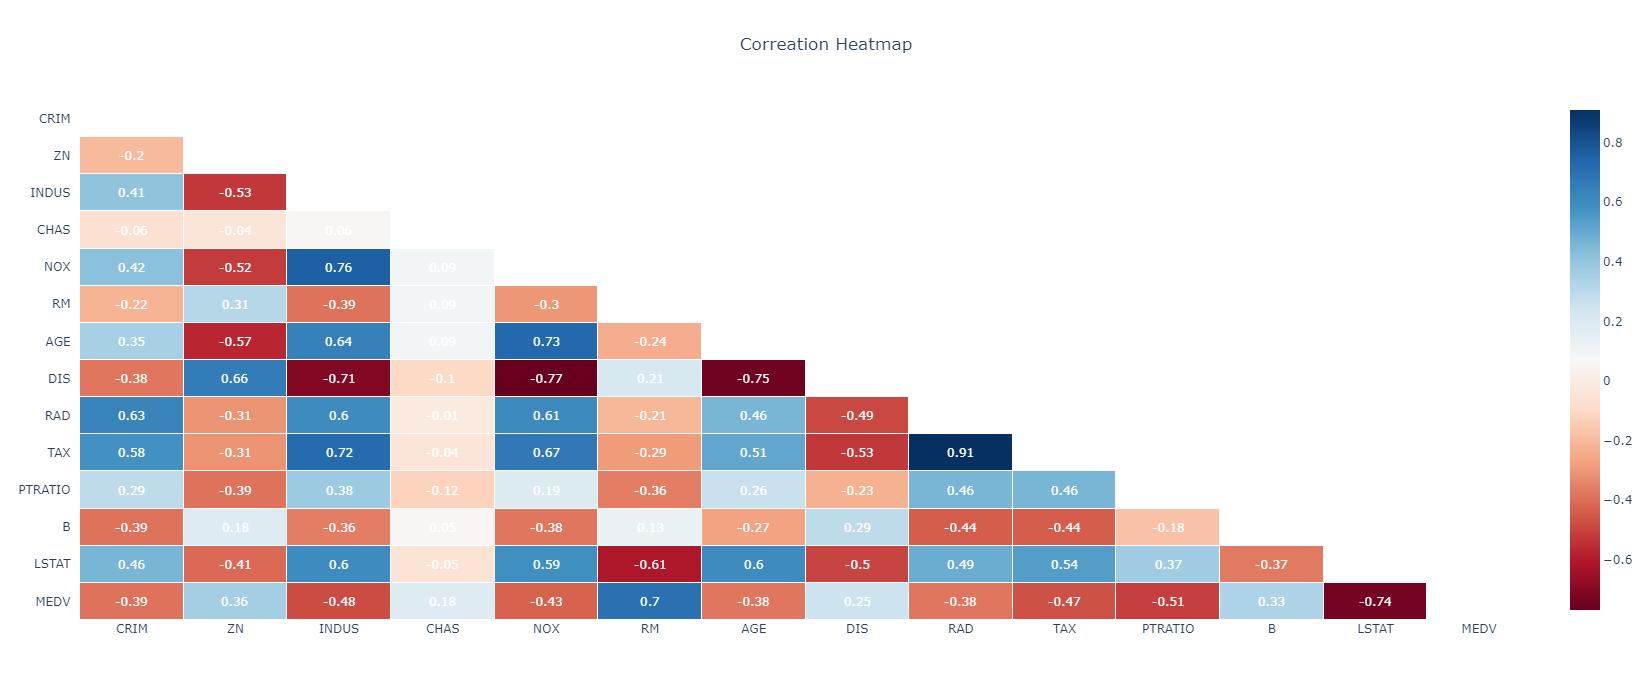

In [11]:
# Check correlations

get_correlation_heatmap(df1)

> The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation. We can see that a few variables are very highly correlation with each other that is variable pairs with absolute correlation value greater than 0.6. This multicollinearity would cause problems in modelling.

#### The potential solutions include the following:

* Remove some of the highly correlated independent variables.
* Linearly combine the independent variables, such as adding them together.
* Partial least squares regression uses principal component analysis to create a set of uncorrelated components to include in the model.
* LASSO and Ridge regression are advanced forms of regression analysis that can handle multicollinearity. If you know how to perform linear least squares regression, you’ll be able to handle these analyses with just a little additional study.

* **As you consider a solution, remember that all of these have downsides. If you can accept less precise coefficients, or a regression model with a high R-squared but hardly any statistically significant variables, then not doing anything about the multicollinearity might be the best solution.**

> **Here, we just want to train a model to best perform on our dataset in predicting the house prices. So, we do not need to do anything about multicollinearity as we're not interested in teh coeffecients or explanatory power of the predictors.**

Source: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

In [12]:
# Target variable (GT) | MEDV: Median value of owner-occupied homes in $1000s

y1 = df1["MEDV"]

y1

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

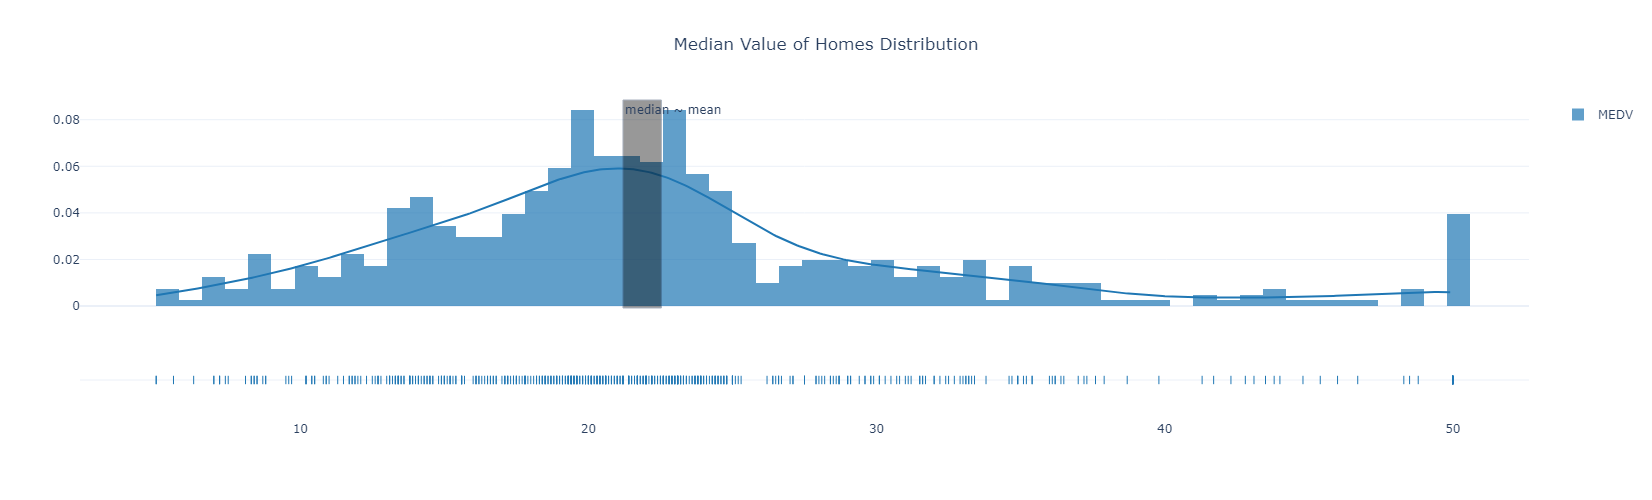

In [13]:
# Target Distribution

group_labels = ['MEDV']

fig = ff.create_distplot([y1], group_labels, bin_size=0.8)

fig.add_vrect(x0=y1.median(), x1=y1.mean(),
              annotation_text="median ~ mean", annotation_position="top left",
              fillcolor="black", opacity=0.4, line_width=1)

fig.update_layout(
        title_text="Median Value of Homes Distribution", 
        title_x=0.5, 
        height=500,
        autosize=False,
        template='plotly_white'
    )
fig.show()

> **Distribution seems to follow a normal distribution with some outliers (houses with extreme values). Median and mean also seem to close by**

In [14]:
# Rename the other columns as features

X1 = df1.drop("MEDV", axis=1)  # features df
X1.head(3)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03

### 1.3. Preprocessing

In [15]:
df1.isna().sum()  # no missing values, no need to impute

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
# split

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state=seed, shuffle=True)
X_train.shape, X_test.shape

((455, 13), (51, 13))

### 1.4. Training

In [17]:
# Fit model

from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

### 1.5. Evaluation

In [18]:
def adjusted_r2_score(y_test, y_pred, n_features):
    """Compute Adjusted R-squared (Adjusted R2)"""
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - n_features - 1)
    return adjusted_r2

def eval_regression(X_train, y_pred, y_test):
    y_pred = np.array(y_pred)
    y_test = np.array(y_test)

    # Compute metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    n_features = X_train.shape[1]
    adjusted_r2 = adjusted_r2_score(y_test, y_pred, n_features)

    print(f"Mean Absolute Error: {mae:.3f}")
    print(f"Mean Squared Error: {mse:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"R-squared: {r2:.3f}")
    print(f"Adjusted R-squared: {adjusted_r2:.3f}")

def eval_regression_metrics(model, X_train, X_test, y_train, y_test):
    """Compute training and testing metrics"""
    try:
        y_train_pred = model.predict(X_train)
        y_pred = model.predict(X_test)
    except Exception as e:
        print(e)
        return

    # Train set metrics
    print("Training:")
    eval_regression(X_train, y_train_pred, y_train)
    print("\nTesting:")
    # Test set metrics
    eval_regression(X_train, y_pred, y_test)

In [19]:
# Evalulate the lr model
eval_regression_metrics(linear_regressor, X_train, X_test, y_train, y_test)

Training:
Mean Absolute Error: 3.283
Mean Squared Error: 22.532
Root Mean Squared Error (RMSE): 4.747
R-squared: 0.740
Adjusted R-squared: 0.732

Testing:
Mean Absolute Error: 3.248
Mean Squared Error: 16.631
Root Mean Squared Error (RMSE): 4.078
R-squared: 0.741
Adjusted R-squared: 0.650


> We can see that resultant metrics, adjusted R-squared is a better metric compared to R2 as it takes into account the number of features used for prediction. It's value will always be lesser than R2. R2 value close to 1 shows that the model is able to learn. Also, train and test metrics are a little bit close to each other. There is some overfiting, but the model is not overfitting too much.

# 2. PCA on housing dataset

### 2.1. PCA

In [20]:
# Standardize the features 

from sklearn.preprocessing import StandardScaler

# only fit on training set to avoid leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# transform on testing set
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.decomposition import PCA

# Defining the number of principal components to generate
n = X_train.shape[1]

# Storing PCA function with n components
pca = PCA(n_components=n, random_state=seed)

# Applying PCA on scaled data | only training to avoid leakage
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))

pca_components = pd.DataFrame(pca.components_)
pca_components.shape

(13, 13)

In [22]:
# The percentage of variance explained by each principal component is stored

var_exp = (pca.explained_variance_ratio_)
pprint(var_exp, compact=True)

array([0.46672722, 0.11265552, 0.09568238, 0.0677954 , 0.0637717 ,
       0.05136125, 0.04036242, 0.03068945, 0.02169589, 0.01653509,
       0.01440924, 0.01310315, 0.00521129])


In [23]:
# Cumulative percentage explained by first three components

print(f"Variance explained by first three components: {np.sum(var_exp[:3])*100:.2f}%")

Variance explained by first three components: 67.51%


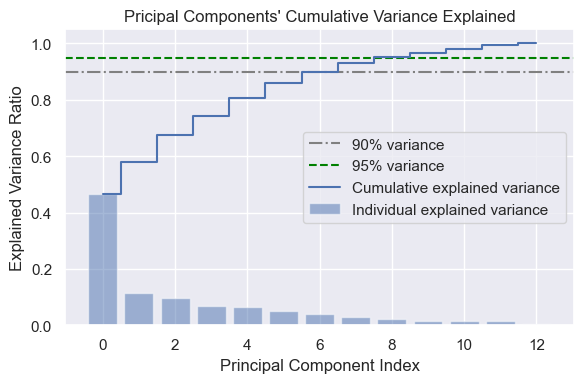

In [24]:
# Cumulative percentage explained by Principal components plot

plt.figure(figsize=(6, 4))

cum_sum_exp = np.cumsum(var_exp)
plt.axhline(y=0.9, color='gray', linestyle='-.', label='90% variance')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% variance')
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.title("Pricipal Components' Cumulative Variance Explained")
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

> This plot shows the cumulative percentage of variance explaiend by each additional principal component. We can see that arund **6 principal components are enough to account for 90% of the variance**. Also, around **8 principal components explain 95%** of variance of the data

In [25]:
X_train_pca.shape, X_test_pca.shape

((455, 13), (51, 13))

### 2.2. Training

In [26]:
# Select first three components

X_train_pca_top3 = X_train_pca[[0, 1, 2]]
X_test_pca_top3 = X_test_pca[[0, 1, 2]]
X_train_pca_top3.head(3)

0         1         2
0 -2.253256 -0.478063 -0.527810
1  4.908587 -2.814194  2.840703
2  1.691643  2.310960  3.945495

In [27]:
# Fit model

linear_regressor_pca = LinearRegression()
linear_regressor_pca.fit(X_train_pca_top3, y_train)

LinearRegression()

### 2.3. Evaluation

In [28]:
# Q1 simple linear regression
eval_regression_metrics(linear_regressor, X_train, X_test, y_train, y_test)

Training:
Mean Absolute Error: 3.283
Mean Squared Error: 22.532
Root Mean Squared Error (RMSE): 4.747
R-squared: 0.740
Adjusted R-squared: 0.732

Testing:
Mean Absolute Error: 3.248
Mean Squared Error: 16.631
Root Mean Squared Error (RMSE): 4.078
R-squared: 0.741
Adjusted R-squared: 0.650


In [29]:
# Linear regression with first 3 principal components
eval_regression_metrics(linear_regressor_pca, X_train_pca_top3, X_test_pca_top3, y_train, y_test)

Training:
Mean Absolute Error: 3.819
Mean Squared Error: 30.727
Root Mean Squared Error (RMSE): 5.543
R-squared: 0.645
Adjusted R-squared: 0.643

Testing:
Mean Absolute Error: 3.641
Mean Squared Error: 24.660
Root Mean Squared Error (RMSE): 4.966
R-squared: 0.616
Adjusted R-squared: 0.592


> **After doing PCA, we have selected only first three principal components to train the linear model. This helped in dealing with the multicollinearity issue we have seen earlier. However, there will be loss of some information by selecting only the first three principal components as the variance explained by them is just 67.51%.**

> **But still using just three principal components we have acheived a very similar MAE, MSE, RMSE, R2 metrics. This means that the model is still able to predict quite effectively just using the first thee PC's. Also, the delta between training and testing is also lower in case of pca model showing the model is not overfitting.**

In [30]:
# Trying with 8 principal components

# Select first three components

X_train_pca_top8 = X_train_pca[list(range(8))]
X_test_pca_top8 = X_test_pca[list(range(8))]
X_train_pca_top8.head(3)

0         1         2         3         4         5         6  \
0 -2.253256 -0.478063 -0.527810  0.151462 -0.247330 -0.231699  0.074968   
1  4.908587 -2.814194  2.840703 -0.532303  0.713389 -1.390099  3.283140   
2  1.691643  2.310960  3.945495  2.824313 -1.676264 -0.556455 -0.755022   

          7  
0  0.894289  
1  1.123032  
2 -0.558810

In [31]:
# Fit model

linear_regressor_pca_2 = LinearRegression()
linear_regressor_pca_2.fit(X_train_pca_top8, y_train)

# Linear regression with first 3 principal components
eval_regression_metrics(linear_regressor_pca_2, X_train_pca_top8, X_test_pca_top8, y_train, y_test)

Training:
Mean Absolute Error: 3.384
Mean Squared Error: 25.485
Root Mean Squared Error (RMSE): 5.048
R-squared: 0.706
Adjusted R-squared: 0.700

Testing:
Mean Absolute Error: 3.279
Mean Squared Error: 19.983
Root Mean Squared Error (RMSE): 4.470
R-squared: 0.689
Adjusted R-squared: 0.630


> **We can see further improvement in R2 with no overfitting using 8 PC's**

# 3. PCA, Logistic Regression on Iris Dataset

### 3.1. Load the Dataset

In [32]:
# Load iris dataset from Sklearn
from sklearn import datasets

dataset = datasets.load_iris()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [33]:
print(dataset["DESCR"])  # description

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [34]:
dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [35]:
X2 = dataset["data"]
X2.shape

(150, 4)

In [36]:
y2 = dataset["target"]
y2.shape

(150,)

In [37]:
np.unique(y2)  # three different classes in target

# - Iris-Setosa
# - Iris-Versicolour
# - Iris-Virginica

array([0, 1, 2])

In [38]:
df2 = pd.concat([
    pd.DataFrame(X2, columns=dataset["feature_names"]),
    pd.DataFrame(y2, columns=["class"])],
    axis=1)
df2

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     class  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
145      2  
146      2  
147      2  
148      2  
149      2  

[150 rows x 5 columns]

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


> all are numerical features, and class is categorical variables encoded as an integer

### 3.2. EDA

In [40]:
df2.describe()  # basic descr. stats

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)       class  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

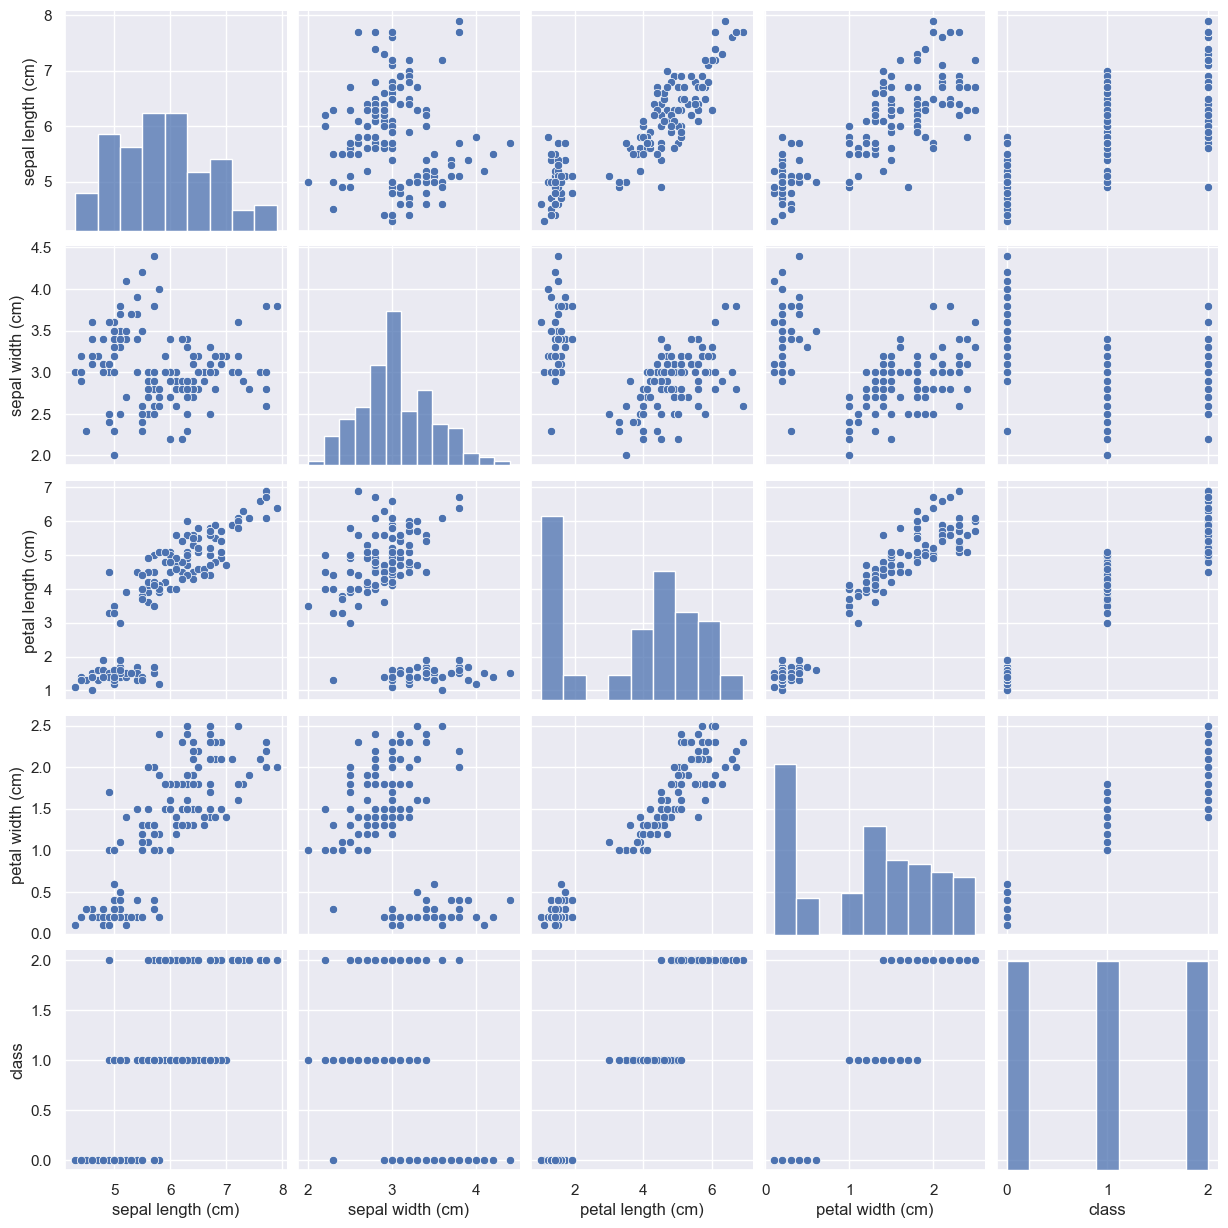

In [41]:
# pairplot
sns.set()
sns.pairplot(df2)
plt.show()

> we can see a few predictors which seem to be correlated with each other

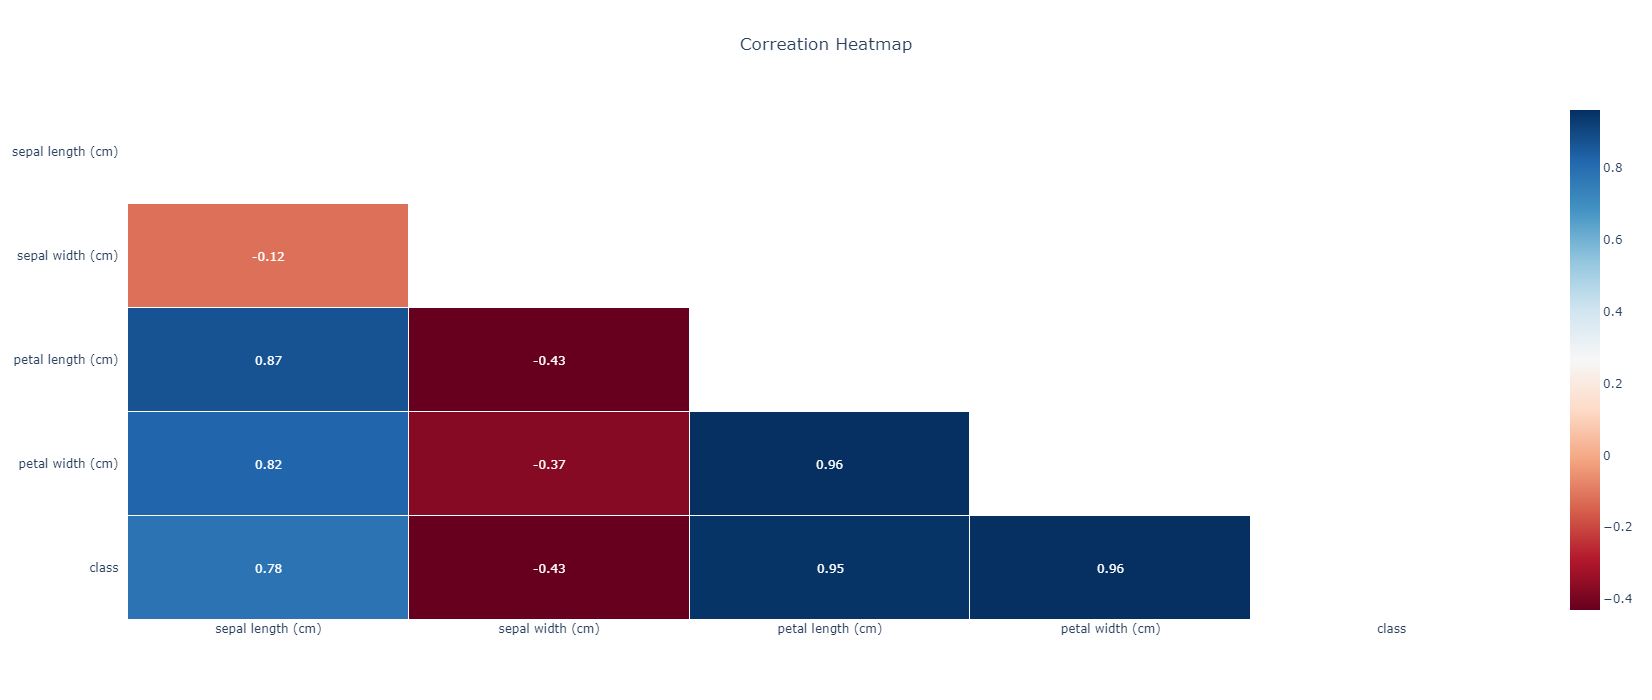

In [42]:
get_correlation_heatmap(df2)

> The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

> **We can see that petal length and sepal length, petal width and sepal length, and petal width and petal length are very highly correlated with each other.**

> **Also, the target variable class is highly correlated with petal length, petal widhth and sepal length**

In [43]:
df2["class"].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

> **Distribution is completely balanced. All classes in the target are equally distributed**

### 3.3. Preprocessing

In [44]:
df2.isna().sum()  # no missing values, no need to impute

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [45]:
X2.shape, y2.shape

((150, 4), (150,))

In [46]:
# split

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.15, random_state=seed, shuffle=True)
X_train.shape, X_test.shape

((127, 4), (23, 4))

In [47]:
pd.DataFrame(y_train)[0].value_counts()

2    44
0    43
1    40
Name: 0, dtype: int64

In [48]:
pd.DataFrame(y_test)[0].value_counts()

1    10
0     7
2     6
Name: 0, dtype: int64

### 3.4. PCA

In [49]:
# Standardize the features 

from sklearn.preprocessing import StandardScaler

# only fit on training set to avoid leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# transform on testing set
X_test_scaled = scaler.transform(X_test)

In [50]:
from sklearn.decomposition import PCA

# Defining the number of principal components to generate
n = X_train.shape[1]

# Storing PCA function with n components
pca = PCA(n_components=n, random_state=seed)

# Applying PCA on scaled data | only training to avoid leakage
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))

pca_components = pd.DataFrame(pca.components_)
pca_components.shape

(4, 4)

In [51]:
# The percentage of variance explained by each principal component is stored

var_exp = (pca.explained_variance_ratio_)
pprint(var_exp, compact=True)

array([0.73260801, 0.22673802, 0.03573128, 0.00492269])


In [52]:
# Cumulative percentage explained by first three components

print(f"Variance explained by first three components: {np.sum(var_exp[:3])*100:.2f}%")

Variance explained by first three components: 99.51%


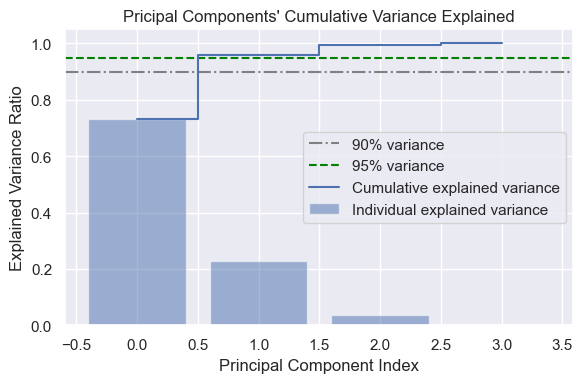

In [53]:
# Cumulative percentage explained by Principal components plot

plt.figure(figsize=(6, 4))

cum_sum_exp = np.cumsum(var_exp)
plt.axhline(y=0.9, color='gray', linestyle='-.', label='90% variance')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% variance')
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.title("Pricipal Components' Cumulative Variance Explained")
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

> This plot shows the cumulative percentage of variance explaiend by each additional principal component. We can see that just **2 principal components are enough to account for 95% of the variance**. Also, around **3 principal components explain 99%** of variance of the data

In [54]:
X_train_pca.shape, X_test_pca.shape

((127, 4), (23, 4))

### 3.4. Training

In [55]:
# Select first three components

X_train_pca_top3 = X_train_pca[[0, 1, 2]]
X_test_pca_top3 = X_test_pca[[0, 1, 2]]
X_train_pca_top3.head(3)

0         1         2
0  1.260105 -1.675338 -0.242023
1  1.836725  0.588556 -0.685567
2  0.909811  0.048625  0.439825

In [56]:
# Fit model
from sklearn.linear_model import LogisticRegression

logistic_regressor_pca = LogisticRegression()
logistic_regressor_pca.fit(X_train_pca_top3, y_train)

LogisticRegression()

### 3.5. Evaluation

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def eval_classification(X_train, y_pred, y_test):
    y_pred = np.array(y_pred)
    y_test = np.array(y_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy*100:.3f}%")
    print(f"Precision: {precision*100:.3f}%")
    print(f"Recall: {recall*100:.3f}%")
    print(f"F1-Score: {f1*100:.3f}%")
    # Print the classification report (precision, recall, F1-score, support for each class)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    

def eval_classificatoin_metrics(model, X_train, X_test, y_train, y_test):
    """Compute training and testing metrics"""
    try:
        y_train_pred = model.predict(X_train)
        y_pred = model.predict(X_test)
    except Exception as e:
        print(e)
        return

    # Train set metrics
    print("~"*100, "\nTraining:")
    eval_classification(X_train, y_train_pred, y_train)
    print("~"*100, "\nTesting:")
    # Test set metrics
    eval_classification(X_train, y_pred, y_test)

In [58]:
# Evaluate LR classification with first 3 principal components
eval_classificatoin_metrics(logistic_regressor_pca, X_train_pca_top3, X_test_pca_top3, y_train, y_test)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Training:
Accuracy: 96.850%
Precision: 96.925%
Recall: 96.850%
F1-Score: 96.852%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      0.97      0.95        40
           2       0.98      0.93      0.95        44

    accuracy                           0.97       127
   macro avg       0.97      0.97      0.97       127
weighted avg       0.97      0.97      0.97       127

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Testing:
Accuracy: 86.957%
Precision: 87.716%
Recall: 86.957%
F1-Score: 87.115%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      0.80      0.84        10
           2       0.71      0.83      0.77

> After doing PCA, we have selected only first three principal components to train the linear model. This helped in dealing with the multicollinearity issue we have seen earlier. However, there will be loss of some information.

> But still using just three principal components we have acheived a very good accurcy, recall, precision metrics for the training set. However, we see a dip in the R2 metrics as well as incrsed error rate in MAE, MSE and RMSE. The model seems to have learnt the signal well using just the first three principal components which also deals with the multicollinearity issue. **But, we can see that it's overfitting, evident from the testing metrics**

> To mitigate the overfitting, we try regularization next

# 4. L1 / L2 Regularizaion with LR model

In logistic regression, L1 and L2 regularization are techniques used to prevent overfitting and improve the generalization of the model. L1 regularization adds a penalty term to the loss function based on the absolute values of the model's coefficients, while L2 regularization adds a penalty term based on the squared magnitudes of the coefficients. Also, there's elasticnet regression which adds both L1 and L2 penalty terms together. C parameter is the Inverse of regularization strength.

### 4.1. Training with Regularization

In [59]:
# Fit the logistic regression model with L1 regularization
logistic_regressor_l1 = LogisticRegression(penalty='l1', C=5, solver='saga', random_state=seed)
logistic_regressor_l1.fit(X_train_pca_top3, y_train)

# Fit the logistic regression model with L2 regularization
logistic_regressor_l2 = LogisticRegression(penalty='l2', C=5, solver='newton-cg', random_state=seed)
logistic_regressor_l2.fit(X_train_pca_top3, y_train)

LogisticRegression(C=5, random_state=7, solver='newton-cg')

### 4.2. Evaluation

In [60]:
# Evaluate regression with first 3 principal components and L1 regularization
eval_classificatoin_metrics(logistic_regressor_l1, X_train_pca_top3, X_test_pca_top3, y_train, y_test)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Training:
Accuracy: 98.425%
Precision: 98.425%
Recall: 98.425%
F1-Score: 98.425%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        40
           2       0.98      0.98      0.98        44

    accuracy                           0.98       127
   macro avg       0.98      0.98      0.98       127
weighted avg       0.98      0.98      0.98       127

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Testing:
Accuracy: 91.304%
Precision: 93.478%
Recall: 91.304%
F1-Score: 91.442%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.80      0.89        10
           2       0.75      1.00      0.86

In [61]:
# Evaluate regression with first 3 principal components and L2 regularization
eval_classificatoin_metrics(logistic_regressor_l2, X_train_pca_top3, X_test_pca_top3, y_train, y_test)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Training:
Accuracy: 98.425%
Precision: 98.425%
Recall: 98.425%
F1-Score: 98.425%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        40
           2       0.98      0.98      0.98        44

    accuracy                           0.98       127
   macro avg       0.98      0.98      0.98       127
weighted avg       0.98      0.98      0.98       127

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Testing:
Accuracy: 91.304%
Precision: 93.478%
Recall: 91.304%
F1-Score: 91.442%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.80      0.89        10
           2       0.75      1.00      0.86

> **We can see that after regularization, the training and testing metrics are closer together. That is, the model is penalized for learning from the signal. From the testing metrics, it is able to generalize better than before. Therefore, overfitting has been reduced by using regulariztion.**

# 5. PCA on digits Dataset

### 5.1. Load the Dataset

In [62]:
# Load digits dataset from Sklearn
from sklearn import datasets

dataset = datasets.load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [63]:
print(dataset["DESCR"])  # description

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [64]:
pprint(dataset["feature_names"], compact=True)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5',
 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3',
 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1',
 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7',
 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3',
 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1',
 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7',
 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5',
 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [65]:
X3 = dataset["data"]
X3.shape

(1797, 64)

In [66]:
y3 = dataset["target"]
y3.shape

(1797,)

In [67]:
np.unique(y3)  # 10 different classes in target corresponding to the ten single digits

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
df3 = pd.concat([
    pd.DataFrame(X3, columns=dataset["feature_names"]),
    pd.DataFrame(y3, columns=["digit"])],
    axis=1)
df3

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0           0.0        0.0        0.0        0.0  ...        0.0        0.0   
1           0.0        0.0        0.0        0.0  ...        0.0        0.0   
2           0.0        0.0        0.0        0.0  ...        0.0        0.0   
3           0.0        0.0        0.0        8.0  ...        0.0        0.0   
4           0.0        0.0        0.0        0.0  ...        0.0        0.0   
...         ...        ...        ...        ...  ...        ...        ...   
1792        0.0        0.0        0.0        1.0  ...        0.0        0.0   
1793        1.0        0.0        0.0        0.0  ...        0.0        0.0   
1794        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1795        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1796        0.0        0.0        0.0        2.0  ...        0.0        0.0   

      pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0           0.0        6.0       13.0       10.0        0.0        0.0   
1           0.0        0.0       11.0       16.0       10.0        0.0   
2           0.0        0.0        3.0       11.0       16.0        9.0   
3           0.0        7.0       13.0       13.0        9.0        0.0   
4           0.0        0.0        2.0       16.0        4.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        2.0       14.0       15.0        9.0        0.0   
1793        0.0        6.0       16.0       14.0        6.0        0.0   
1794        0.0        2.0        9.0       13.0        6.0        0.0   
1795        0.0        5.0       12.0       16.0       12.0        0.0   
1796        1.0        8.0       12.0       14.0       12.0        1.0   

      pixel_7_7  digit  
0           0.0      0  
1           0.0      1  
2           0.0      2  
3           0.0      3  
4           0.0      4  
...         ...    ...  
1792        0.0      9  
1793        0.0      0  
1794        0.0      8  
1795        0.0      9  
1796        0.0      8  

[1797 rows x 65 columns]

> all are numerical features (px), and class is categorical variables encoded as an integer

### 5.2. EDA

In [69]:
df3.describe().T  # basic descr. stats

count       mean       std  min   25%   50%   75%   max
pixel_0_0  1797.0   0.000000  0.000000  0.0   0.0   0.0   0.0   0.0
pixel_0_1  1797.0   0.303840  0.907192  0.0   0.0   0.0   0.0   8.0
pixel_0_2  1797.0   5.204786  4.754826  0.0   1.0   4.0   9.0  16.0
pixel_0_3  1797.0  11.835838  4.248842  0.0  10.0  13.0  15.0  16.0
pixel_0_4  1797.0  11.848080  4.287388  0.0  10.0  13.0  15.0  16.0
...           ...        ...       ...  ...   ...   ...   ...   ...
pixel_7_4  1797.0  11.809126  4.933947  0.0  10.0  14.0  16.0  16.0
pixel_7_5  1797.0   6.764051  5.900623  0.0   0.0   6.0  12.0  16.0
pixel_7_6  1797.0   2.067891  4.090548  0.0   0.0   0.0   2.0  16.0
pixel_7_7  1797.0   0.364496  1.860122  0.0   0.0   0.0   0.0  16.0
digit      1797.0   4.490818  2.865304  0.0   2.0   4.0   7.0   9.0

[65 rows x 8 columns]

In [70]:
df3["digit"].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: digit, dtype: int64

> **Distribution is completely balanced. All classes in the target are equally distributed**

### 5.3. Preprocessing

In [71]:
# no missing values, no need to impute
na_counts = df3.isna().sum()
print(f"Columns with missing values: ", na_counts[na_counts != 0])

Columns with missing values:  Series([], dtype: int64)


In [72]:
X3.shape, y3.shape

((1797, 64), (1797,))

In [73]:
# split

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.15, random_state=seed, shuffle=True, stratify=y3)
X_train.shape, X_test.shape

((1527, 64), (270, 64))

In [74]:
pd.DataFrame(y_train)[0].value_counts()

1    155
3    155
5    155
6    154
4    154
9    153
7    152
0    151
2    150
8    148
Name: 0, dtype: int64

In [75]:
pd.DataFrame(y_test)[0].value_counts()

3    28
4    27
5    27
6    27
2    27
1    27
9    27
7    27
0    27
8    26
Name: 0, dtype: int64

### 5.4. PCA

In [76]:
# Standardize the features 

from sklearn.preprocessing import StandardScaler

# only fit on training set to avoid leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# transform on testing set
X_test_scaled = scaler.transform(X_test)

In [77]:
from sklearn.decomposition import PCA

# Defining the number of principal components to generate
n = X_train.shape[1]

# Storing PCA function with n components
pca = PCA(n_components=n, random_state=seed)

# Applying PCA on scaled data | only training to avoid leakage
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))

pca_components = pd.DataFrame(pca.components_)
pca_components.shape

(64, 64)

In [78]:
# The percentage of variance explained by each principal component is stored

var_exp = (pca.explained_variance_ratio_)
pprint(var_exp, compact=True)

array([1.19992619e-01, 9.53373989e-02, 8.50042332e-02, 6.55002055e-02,
       4.95753553e-02, 4.04574805e-02, 3.92211673e-02, 3.46236654e-02,
       3.26611385e-02, 3.03300017e-02, 2.89414318e-02, 2.57797590e-02,
       2.32150877e-02, 2.25566331e-02, 2.15614556e-02, 1.93149673e-02,
       1.76641400e-02, 1.64413449e-02, 1.61270845e-02, 1.48579719e-02,
       1.31352724e-02, 1.29473562e-02, 1.17744319e-02, 1.03682367e-02,
       9.53744025e-03, 9.37134931e-03, 8.42240638e-03, 8.12383715e-03,
       7.90639856e-03, 7.34963856e-03, 7.14030073e-03, 6.92046576e-03,
       6.57894743e-03, 6.28058000e-03, 5.95455580e-03, 5.55009096e-03,
       4.90935057e-03, 4.60761792e-03, 4.22883520e-03, 4.13799450e-03,
       4.01668072e-03, 3.55173619e-03, 3.42774172e-03, 3.27172405e-03,
       3.10228154e-03, 2.85103522e-03, 2.69541182e-03, 2.51267155e-03,
       2.35326177e-03, 2.17608541e-03, 2.02711930e-03, 1.91477700e-03,
       1.79351041e-03, 1.67354666e-03, 1.61941499e-03, 1.48527536e-03,
      

In [79]:
# Cumulative percentage explained by first three components

print(f"Variance explained by first three components: {np.sum(var_exp[:3])*100:.2f}%")

Variance explained by first three components: 30.03%


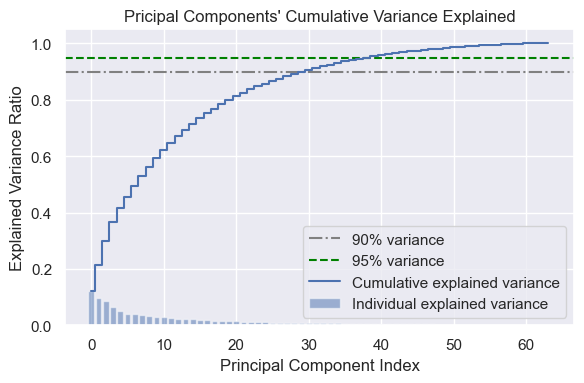

In [80]:
# Cumulative percentage explained by Principal components plot

plt.figure(figsize=(6, 4))

cum_sum_exp = np.cumsum(var_exp)
plt.axhline(y=0.9, color='gray', linestyle='-.', label='90% variance')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% variance')
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.title("Pricipal Components' Cumulative Variance Explained")
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

> This plot shows the cumulative percentage of variance explaiend by each additional principal component. We can see that around **38 principal components are enough to account for 95% of the variance**. Also, around **28 principal components explain 99%** of variance of the data

In [81]:
X_train_pca.shape, X_test_pca.shape

((1527, 64), (270, 64))

In [82]:
# Select first three components

X_train_pca_top3 = X_train_pca[[0, 1, 2]]
X_test_pca_top3 = X_test_pca[[0, 1, 2]]
X_train_pca_top3.head(3)

0         1         2
0  1.313851  0.576306  2.926491
1  1.925591 -2.720883  0.767938
2  1.805145 -2.730037 -2.584975

In [83]:
# Dimensions of the modified dataset
X_train_pca_top3.shape, X_test_pca_top3.shape

((1527, 3), (270, 3))

### 5.5. Visualize

PCA (Principal Component Analysis) is a linear technique that works best with data that has a linear structure. It seeks to identify the underlying principal components in the data by projecting onto lower dimensions, minimizing variance, and preserving large pairwise distancs. PCA focuses on maintaining large pairwise distances to maximize variance. In summary, PCA preserves the variance in the data.

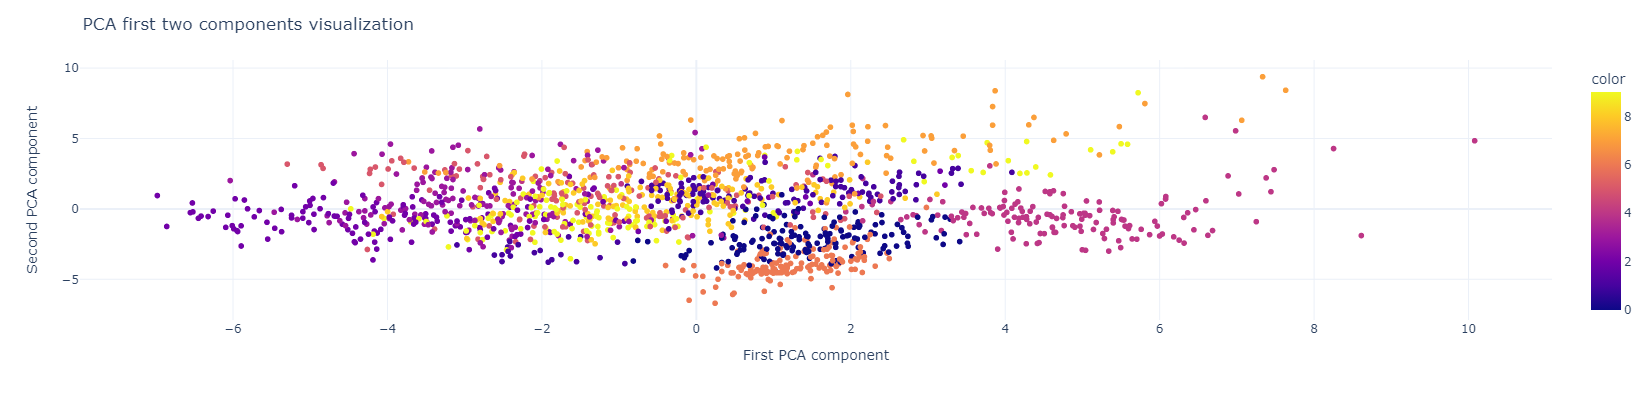

In [84]:
# visualize first two components of PCA w.r.t target variable y

fig = px.scatter(x=X_train_pca_top3[0], y=X_train_pca_top3[1], color=y_train)
fig.update_layout(
    title="PCA first two components visualization",
    xaxis_title="First PCA component",
    yaxis_title="Second PCA component",
    width=800, height=400,
    paper_bgcolor="white",
    autosize=False,
    template='plotly_white'
)

fig.show()

> We can see some sepeartion between classes using just two components

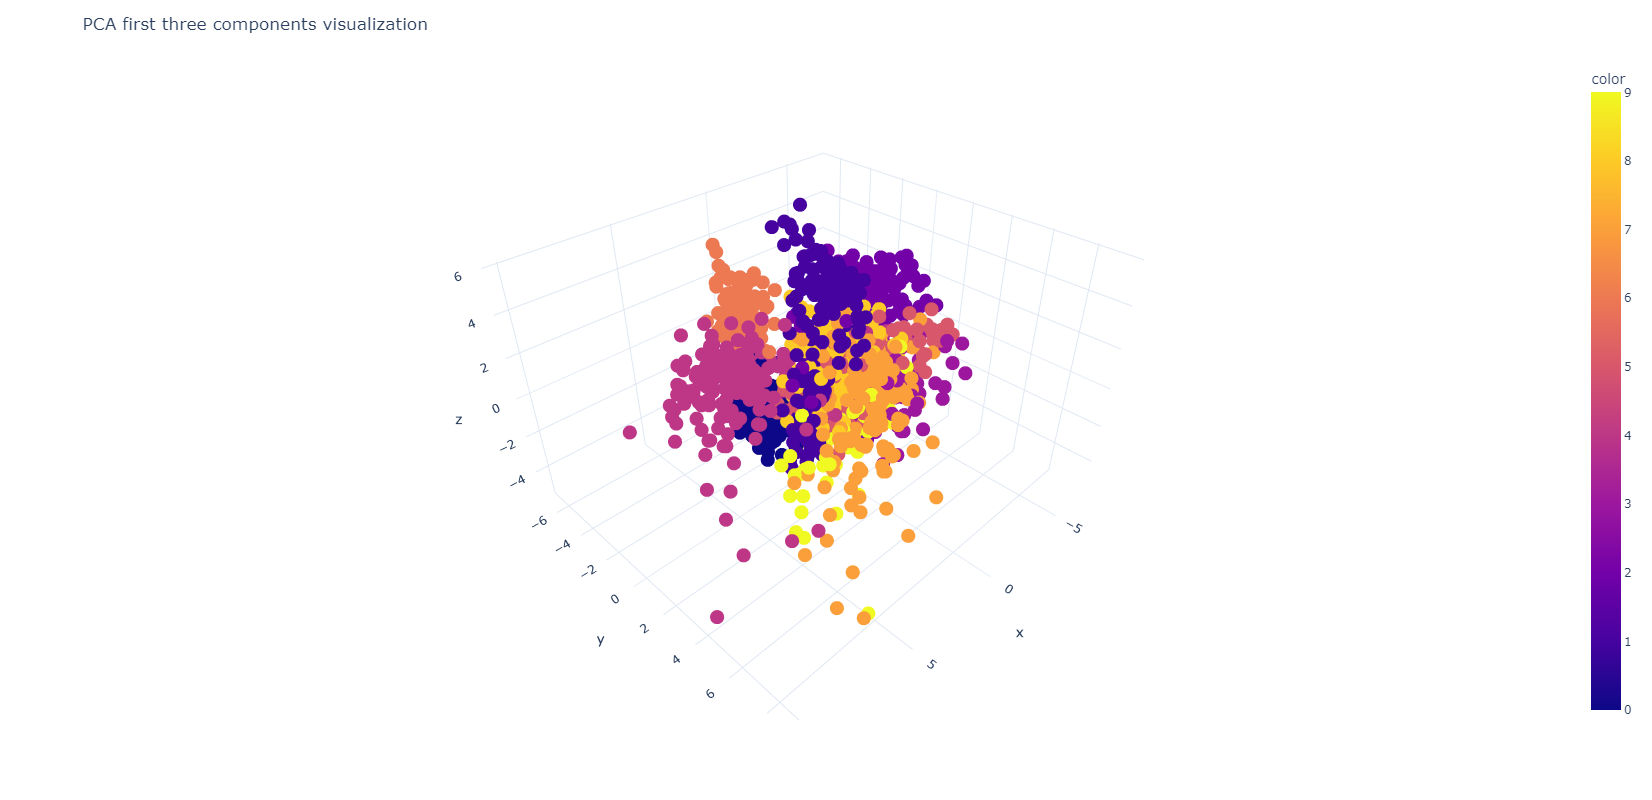

In [85]:
# visualize first three components of t-sne w.r.t target variable y

fig = px.scatter_3d(x=X_train_pca_top3[0], y=X_train_pca_top3[1], z=X_train_pca_top3[2], color=y_train, height=700)

fig.update_layout(
    title="PCA first three components visualization",
    width=800, height=800,
    autosize=True,
    template='plotly_white'
)
fig.show()

> **We can see in the interactive 3d scatter plot that PCA does a relatively better job of separation of the color i.e, the target variable range y in 3 dimensions using just first three components.**

# 6. SVM Classification with digits Dataset

In [86]:
from sklearn.svm import SVC

# Fit the SVM classifier with RBF kernel
svc_rbf = SVC(kernel='rbf', random_state=seed, break_ties=True)
svc_rbf.get_params()

{'C': 1.0,
 'break_ties': True,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 7,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [87]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define hyperparameters to tune
param_grid = {
    'kernel': ['rbf'],  # Just using the rbf kernel (non-linear decision boundary)
    'C': [.1, 1, 5, 10],  # Regularization parameter
    'gamma': ['auto', 'scale', 'float']  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
}

grid_search = GridSearchCV(estimator=svc_rbf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train_pca_top3, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best model with hyperparams hyperparameters
print("Best Model:", best_model)

Best Model: SVC(C=1, break_ties=True, gamma='auto', random_state=7)


In [88]:
# Evaluate LR classification with first 3 principal components
eval_classificatoin_metrics(best_model, X_train_pca_top3, X_test_pca_top3, y_train, y_test)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Training:
Accuracy: 80.681%
Precision: 80.344%
Recall: 80.681%
F1-Score: 80.073%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       151
           1       0.80      0.95      0.87       155
           2       0.93      0.79      0.85       150
           3       0.75      0.74      0.75       155
           4       0.97      0.95      0.96       154
           5       0.57      0.36      0.44       155
           6       0.99      0.99      0.99       154
           7       0.80      0.83      0.81       152
           8       0.61      0.65      0.63       148
           9       0.69      0.83      0.75       153

    accuracy                           0.81      1527
   macro avg       0.80      0.81      0.80      1527
weighted avg       0.80      0.81      0.80      1527

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

> **We see some overfitting issue, but using rbf kernel we are able to use just three principal components to achieve a decent 76.3% accuracy on the out of sample test set. As, we have a balanced set. We can directly use the accuracy metric to judge the performance of the model**

> **We can also see that in both the training and testing set, performance is relatively not good for the digits 3, 5, 8 & 9 dragging the avg. accuracy done by a fair bit. To improve this, we might opt to do data augmentation for these digits or even get more data which would help clearly separate these classes from others**

# 7. tSNE with Diabetes Dataset

### 7.1. Load the Dataset

In [89]:
# Load diabetes dataset from Sklearn
from sklearn import datasets

dataset = datasets.load_diabetes()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [90]:
print(dataset["DESCR"])  # description

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [91]:
pprint(dataset["feature_names"], compact=True)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [92]:
X4 = dataset["data"]
X4.shape

(442, 10)

In [93]:
y4 = dataset["target"]
y4.shape

(442,)

In [94]:
df4 = pd.concat([
    pd.DataFrame(X4, columns=dataset["feature_names"]),
    pd.DataFrame(y4, columns=["target"])],
    axis=1)
df4

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  

[442 rows x 11 columns]

In [95]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


> Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of `n_samples` (i.e. the sum of squares of each column totals 1).


> all are numerical features (age, sex, bmi ...), and target is also a numerical value indicating the disease progression one year after baseline

### 7.2. EDA

In [96]:
df4.describe()  # basic descr. stats

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

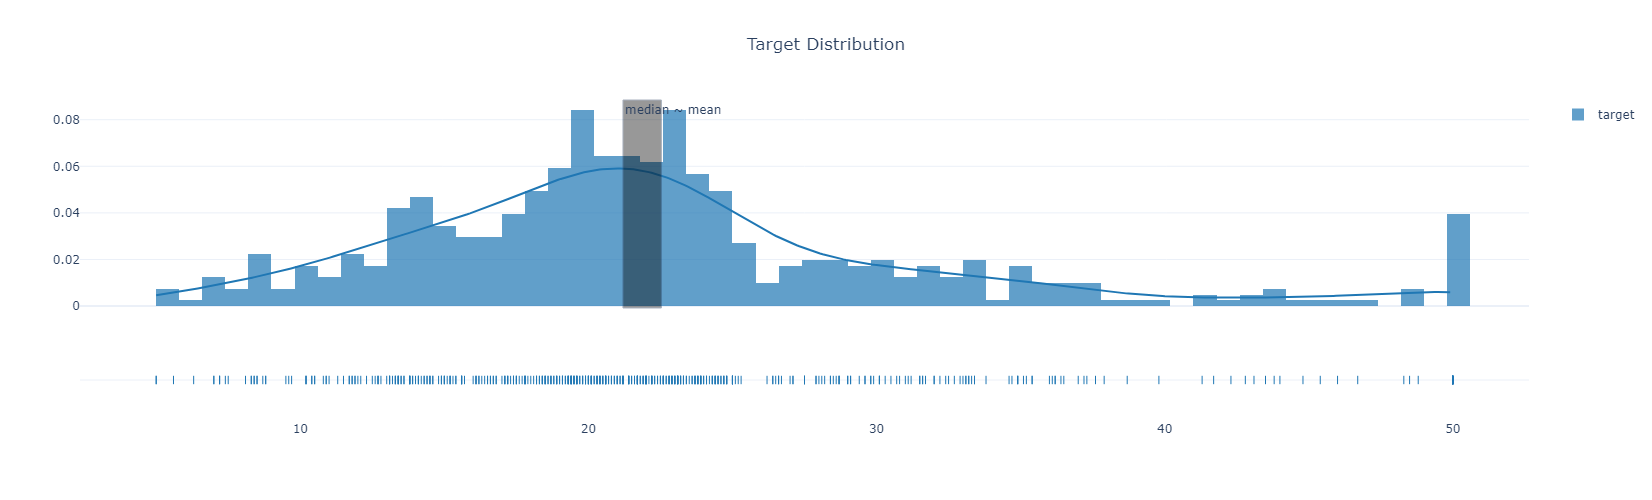

In [97]:
# Target Distribution

group_labels = ['target']

fig = ff.create_distplot([y1], group_labels, bin_size=0.8)

fig.add_vrect(x0=y1.median(), x1=y1.mean(),
              annotation_text="median ~ mean", annotation_position="top left",
              fillcolor="black", opacity=0.4, line_width=1)

fig.update_layout(
        title_text="Target Distribution",
        title_x=0.5,
        height=500,
        autosize=False,
        template='plotly_white'
    )
fig.show()

> **Distribution seems to be normal with a few outliers in the right extreme**

### 7.3. Preprocessing

In [98]:
# no missing values, no need to impute
na_counts = df4.isna().sum()
print(f"Columns with missing values: ", na_counts[na_counts != 0])

Columns with missing values:  Series([], dtype: int64)


In [99]:
X4.shape, y4.shape

((442, 10), (442,))

### 4.4. t-SNE

> **t-SNE** (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data. Non-linear dimensionality reduction means that the algorithm allows us to separate data that cannot be separated by a straight line. 

> The t-SNE algorithm finds the similarity measure between pairs of instances in higher and lower dimensional space. After that, it tries to optimize two similarity measures. It does all of that in three steps. 

* t-SNE models a point being selected as a neighbor of another point in both higher and lower dimensions. It starts by calculating a pairwise similarity between all data points in the high-dimensional space using a Gaussian kernel. The points that are far apart have a lower probability of being picked than the points that are close together. 
* Then, the algorithm tries to map higher dimensional data points onto lower dimensional space while preserving the pairwise similarities. 
* It is achieved by minimizing the divergence between the probability distribution of the original high-dimensional and lower-dimensional. The algorithm uses gradient descent to minimize the divergence. The lower-dimensional embedding is optimized to a stable state.

In [100]:
from sklearn.manifold import TSNE

k = 3
tsne = TSNE(n_components=k, random_state=7)

# Apply t-SNE to the data
X4_tsne = pd.DataFrame(tsne.fit_transform(X4))

print(f"NO. of components {k} | KL Divergence {tsne.kl_divergence_}")

NO. of components 3 | KL Divergence 0.6921156644821167


In [101]:
X4_tsne.shape

(442, 3)

### 7.5. Visualize

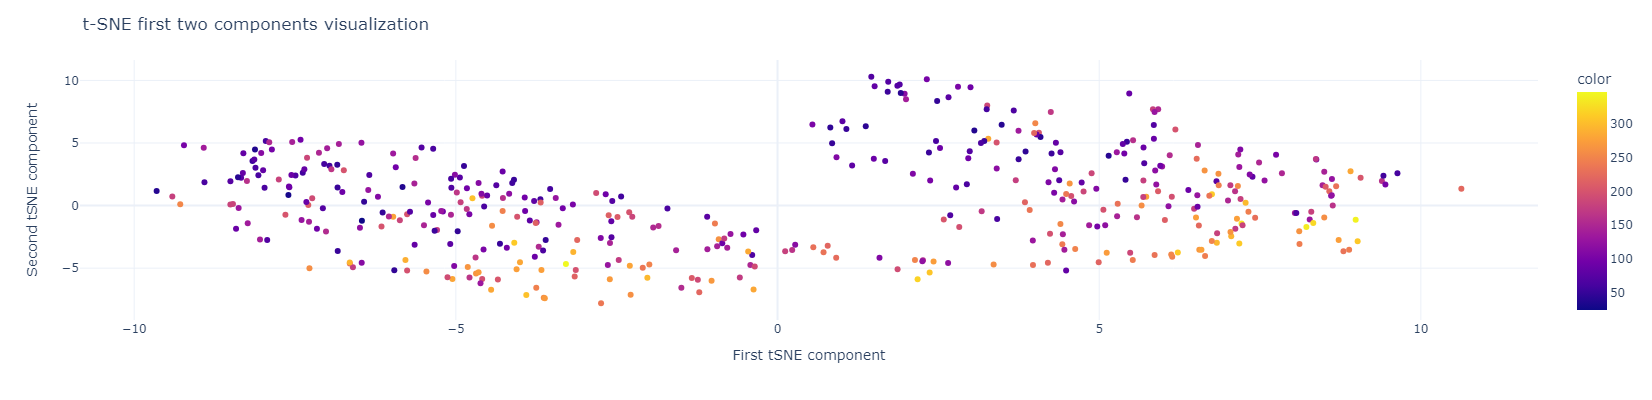

In [102]:
# visualize first two components of PCA w.r.t target variable y

fig = px.scatter(x=X4_tsne[0], y=X4_tsne[1], color=y4)
fig.update_layout(
    title="t-SNE first two components visualization",
    xaxis_title="First tSNE component",
    yaxis_title="Second tSNE component",
    width=800, height=400,
    paper_bgcolor="white",
    autosize=False,
    template='plotly_white'
)

fig.show()

> We can see some good sepeartion between classes using just two components

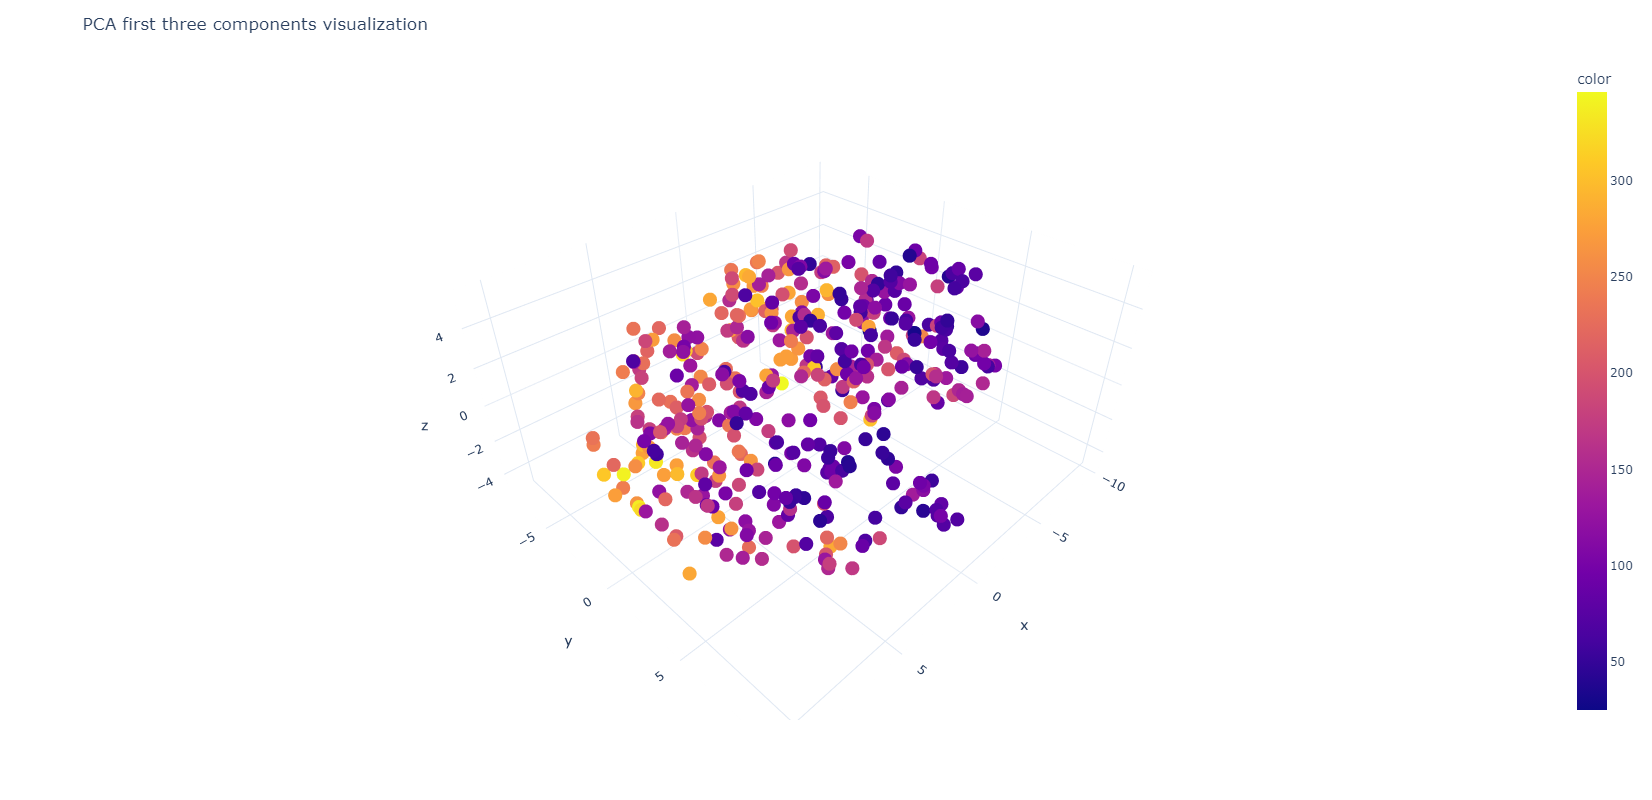

In [103]:
# visualize first three components of t-sne w.r.t target variable y

fig = px.scatter_3d(x=X4_tsne[0], y=X4_tsne[1], z=X4_tsne[2], color=y4, height=700)

fig.update_layout(
    title="PCA first three components visualization",
    width=800, height=800,
    autosize=True,
    template='plotly_white'
)
fig.show()

> **We can see in the interactive 3d scatter plot that t-SNE does a relatively better job of separation of the color i.e, the target variable range y in 3 dimensions using just first three components.**

# 8. SVM Regression with diabetes dataset

In [104]:
# split

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X4_tsne, y4, test_size=0.1, random_state=seed, shuffle=True)
X_train.shape, X_test.shape

((397, 3), (45, 3))

In [105]:
from sklearn.svm import SVR

# Fit the SVM classifier with poly kernel
svr_poly = SVR()
svr_poly.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Polynomial Kernel: It represents the similarity of vectors in the training set of data in a feature space over polynomials of the original variables used in the kernel.

In [106]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define hyperparameters to tune
param_grid = {
    'kernel': ['poly'],  # Just using the poly kernel
    'C': [.1, 1, 5, 10, 20, 30],  # Regularization parameter
    'gamma': ['auto', 'scale', 'float'],  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
    'epsilon': [0.1, 0.01, 0.001], # Epsilon parameter in the epsilon-insensitive loss function
}

grid_search = GridSearchCV(estimator=svr_poly, param_grid=param_grid,
                           cv=7, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best model with hyperparams hyperparameters
print("Best Model:", best_model)

Best Model: SVR(C=5, epsilon=0.001, kernel='poly')


In [107]:
# Evaluate LR classification with first 3 principal components
eval_regression_metrics(best_model, X_train, X_test, y_train, y_test)

Training:
Mean Absolute Error: 53.329
Mean Squared Error: 4011.723
Root Mean Squared Error (RMSE): 63.338
R-squared: 0.335
Adjusted R-squared: 0.330

Testing:
Mean Absolute Error: 51.301
Mean Squared Error: 3872.119
Root Mean Squared Error (RMSE): 62.226
R-squared: 0.229
Adjusted R-squared: 0.172


In [108]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define hyperparameters to tune
param_grid = {
    'kernel': ['rbf'],  # Just using the poly kernel
    'C': [.1, 1, 5, 10, 20, 30],  # Regularization parameter
    'gamma': ['auto', 'scale', 'float'],  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
    'epsilon': [0.1, 0.01, 0.001], # Epsilon parameter in the epsilon-insensitive loss function
}

grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid,
                           cv=7, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best model with hyperparams hyperparameters
print("Best Model:", best_model)

Best Model: SVR(C=30)


In [109]:
# Evaluate LR classification with first 3 principal components
eval_regression_metrics(best_model, X_train, X_test, y_train, y_test)

Training:
Mean Absolute Error: 42.650
Mean Squared Error: 3053.315
Root Mean Squared Error (RMSE): 55.257
R-squared: 0.494
Adjusted R-squared: 0.490

Testing:
Mean Absolute Error: 45.918
Mean Squared Error: 3524.778
Root Mean Squared Error (RMSE): 59.370
R-squared: 0.298
Adjusted R-squared: 0.246


> **We see some overfitting issue, but using rbf kernel, we are able to see better performance than poly**

> **Although poly is a non-linear kernel which enables forming non-linear decision boundary, it doesn't seem to be the best fit for us**

> **We see overfitting issue in both as the model performs relatively better on training set**

# 9. Hyper-parameter findings

Support Vector Machines (SVM) can be used for both classification and regression tasks. The hyperparameters for SVM vary depending on whether you are performing classification or regression as we've seen in the param_grids used in Q6 (classification) and Q8 (regression)

* Hyperparameters for Support Vector Classification (SVC):

    * C: Regularization parameter. It controls the trade-off between maximizing the margin and minimizing the classification error. Smaller values of C increase the margin but may lead to misclassification, while larger values may decrease the margin but correctly classify more points. (default=1.0)

    * kernel: The kernel function used to transform the input data into higher-dimensional space. Common choices are 'linear', 'poly' (polynomial), 'rbf' (Radial Basis Function), 'sigmoid', etc. The choice of the kernel impacts the separation boundary. (default='rbf')

    * gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels. It controls the influence of a single training example and affects the smoothness of the decision boundary. A smaller gamma leads to a smoother decision boundary, while a larger gamma makes the boundary more complex. (default='scale' which is 1 / (n_features * X.var()))

    * degree: Degree of the polynomial kernel. It is used only when kernel='poly'. Higher degrees can fit complex relationships but may overfit the data. (default=3)

    * class_weight: It is used to balance the class weights in case the classes are imbalanced. If set to 'balanced', the class weights are inversely proportional to the class frequencies.

* Hyperparameters for Support Vector Regression (SVR):

    * C: Regularization parameter, similar to SVC. It controls the trade-off between fitting the training data and keeping the model simple. Smaller values of C increase regularization and simplify the model. (default=1.0)

    * kernel: The kernel function, similar to SVC. Common choices are 'linear', 'poly', 'rbf', 'sigmoid', etc. (default='rbf')

    * gamma: Kernel coefficient, similar to SVC. It controls the influence of a single training example. (default='scale')

    *epsilon: Epsilon-tube around the regression line. It specifies the margin within which no penalty is associated with errors. Larger values allow more errors within the tube. (default=0.1)

**We can see from results in Q6 and Q8 that performance of an ML model is very much affected by the hyperparameters**, and it often requires tuning through techniques like cross-validation, Grid Search, Randomized Search or Bayesian Search to find the best hyperparameters for a given ML algo for a problem.

## References

Agarwal, A. (2018). Linear Regression on Boston Housing Dataset. [online] Medium. Available at: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155.

Folkman, T. (2020). Why You Are Using t-SNE Wrong. [online] Medium. Available at: https://towardsdatascience.com/why-you-are-using-t-sne-wrong-502412aab0c0.

Frost, J. (2017). Multicollinearity in Regression Analysis: Problems, Detection, and Solutions. [online] Statistics By Jim. Available at: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/.

plotly.com. (n.d.). Plotly Open Source Graphing Libraries. [online] Available at: https://plotly.com/graphing-libraries/.

scikit-learn developers (2014). sklearn.linear_model.LogisticRegression — scikit-learn 0.21.2 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

scikit-learn. (n.d.). 1.4. Support Vector Machines. [online] Available at: https://scikit-learn.org/stable/modules/svm.html#svc.

scikit-learn.org. (n.d.). sklearn.datasets.load_iris — scikit-learn 0.24.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html.

Srinivasan, A.V. (2019). Why exclude highly correlated features when building regression model ?? [online] Medium. Available at: https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e.